In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

The assumption you are referring to is **Homoscedasticity**, which is a critical assumption for multiple linear regression to be valid. Here's a breakdown of why it matters and how to diagnose it:

### **Homoscedasticity Assumption**
- **Definition**: The variance of the residuals (errors) is constant across all levels of the fitted values (predicted values).
- **Why it matters**: 
  - If the variance of residuals is not constant (i.e., heteroscedasticity is present), the standard errors of the regression coefficients may be biased. This can lead to unreliable hypothesis tests (e.g., p-values) and confidence intervals, making it difficult to draw valid conclusions from the model.
  - Heteroscedasticity can also affect the efficiency of the regression coefficients, meaning they may no longer be the best linear unbiased estimators (BLUE).

### **Diagnostic Plot**
- **Plot of Absolute Residuals vs Fitted Values**: 
  - This plot helps visualize whether the spread of residuals changes as the fitted values increase or decrease.
  - **What to look for**: The spread of the residuals should remain roughly consistent across all levels of the fitted values. If the spread widens or narrows systematically, this indicates heteroscedasticity.

### **How to Address Heteroscedasticity**
If heteroscedasticity is detected, you can consider the following remedies:
1. **Transform the dependent variable**: Apply transformations like log, square root, or inverse to stabilize the variance.
2. **Use weighted least squares (WLS)**: Assign weights to observations based on the variance of residuals.
3. **Robust standard errors**: Use robust standard errors (e.g., Huber-White standard errors) to adjust for heteroscedasticity without changing the model.
4. **Check for omitted variables**: Ensure that all relevant predictors are included in the model, as omitted variables can sometimes cause heteroscedasticity.

By ensuring homoscedasticity, you can trust the validity of your regression results and make reliable inferences.

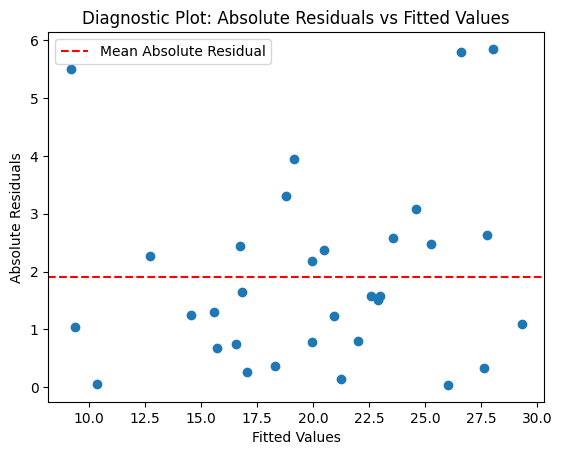

In [2]:
# Example: Fit a multiple linear regression model
# Replace this with your dataset and model
data = sm.datasets.get_rdataset("mtcars").data
model = ols("mpg ~ wt + hp", data=data).fit()

# Get fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Plot absolute residuals vs fitted values
plt.scatter(fitted_values, np.abs(residuals))
plt.axhline(y=np.mean(np.abs(residuals)), color='red', linestyle='--', label="Mean Absolute Residual")
plt.xlabel("Fitted Values")
plt.ylabel("Absolute Residuals")
plt.title("Diagnostic Plot: Absolute Residuals vs Fitted Values")
plt.legend()
plt.show()

### **What to Look for in the Plot**
1. **Consistent Spread (Homoscedasticity)**:
   - If the spread of the absolute residuals is roughly constant across all fitted values, this indicates homoscedasticity. The points should look randomly scattered around the horizontal red line (mean absolute residual).

2. **Funnel Shape (Heteroscedasticity)**:
   - If the spread of residuals increases or decreases systematically as the fitted values increase, this indicates heteroscedasticity. For example:
     - A widening funnel shape (residuals spread out as fitted values increase) suggests increasing variance.
     - A narrowing funnel shape (residuals cluster closer as fitted values increase) suggests decreasing variance.

3. **Patterns or Trends**:
   - If you see any clear patterns (e.g., curves, clusters, or trends) in the plot, this may also indicate a violation of the homoscedasticity assumption.

---

### **Example Interpretation**
- **Good Case**: The points are randomly scattered around the red line, with no clear pattern or trend. This suggests homoscedasticity.
- **Bad Case**: The points form a funnel shape, with residuals spreading out as fitted values increase. This suggests heteroscedasticity.

__________________________________

_________________________
# **Bayesian Inference** and its foundation in **conditional probability**, specifically through **Bayes' Theorem**:

---

### **1. Bayesian Inference**
Bayesian inference is a statistical method that updates the probability of a hypothesis (or model) as more evidence (data) becomes available. It is based on Bayes' Theorem, which provides a way to revise existing predictions or beliefs (prior) in light of new data.

---

### **2. Bayes' Theorem**
The formula for Bayes' Theorem is:

$
p(model|data) = \frac{p(data|model) \cdot p(model)}{p(data)}
$

Where:
- **\( p(model|data) \)**: The **posterior probability**. This is the probability of the model being true given the observed data. It is what we are trying to infer.
- **\( p(data|model) \)**: The **likelihood**. This is the probability of observing the data if the model is true.
- **\( p(model) \)**: The **prior probability**. This represents our initial belief about the model before seeing the data.
- **\( p(data) \)**: The **evidence** or **marginal likelihood**. This is the probability of observing the data under all possible models. It acts as a normalization constant to ensure the posterior probability sums to 1.

---

### **3. Key Components Explained**

#### **a. Prior (\( p(model) \))**
- The prior represents our initial belief or knowledge about the model before observing the data.
- For example, if we are trying to infer whether a coin is fair, our prior might be that there is a 50% chance it is fair and a 50% chance it is biased.

#### **b. Likelihood (\( p(data|model) \))**
- The likelihood quantifies how well the model explains the observed data.
- For example, if the model is that the coin is fair, the likelihood would calculate the probability of observing a specific sequence of heads and tails under this assumption.

#### **c. Evidence (\( p(data) \))**
- The evidence is the total probability of observing the data, considering all possible models. It ensures that the posterior probability is properly normalized.
- Calculating the evidence can be challenging, especially for complex models, as it often involves integrating over all possible parameter values.

#### **d. Posterior (\( p(model|data) \))**
- The posterior is the updated belief about the model after observing the data. It combines the prior belief with the new evidence (data) using Bayes' Theorem.
- For example, after flipping the coin multiple times, the posterior would update our belief about whether the coin is fair or biased.

---

### **4. Why Bayesian Inference Matters**
- **Flexibility**: Bayesian inference allows us to incorporate prior knowledge (prior) and update it with new data (likelihood) to arrive at a refined belief (posterior).
- **Uncertainty Quantification**: It provides a probabilistic framework for quantifying uncertainty in our inferences.
- **Iterative Learning**: As new data becomes available, the posterior can be used as the prior for further updates, enabling continuous learning.

---

### **5. Example**
Suppose we want to determine whether a coin is fair (i.e., \( P(heads) = 0.5 \)) or biased.

- **Prior**: We start with a belief that there is a 50% chance the coin is fair and a 50% chance it is biased.
- **Likelihood**: We flip the coin 10 times and observe 7 heads. The likelihood calculates the probability of this outcome under the fair and biased models.
- **Posterior**: Using Bayes' Theorem, we update our belief about the coin being fair or biased based on the observed data.

---

### **6. Challenges**
- **Choosing a Prior**: The choice of prior can influence the posterior, especially with limited data. It is important to choose a prior that reflects reasonable assumptions.
- **Computational Complexity**: Calculating the evidence (\( p(data) \)) can be computationally intensive for complex models, often requiring techniques like Markov Chain Monte Carlo (MCMC) for approximation.

---

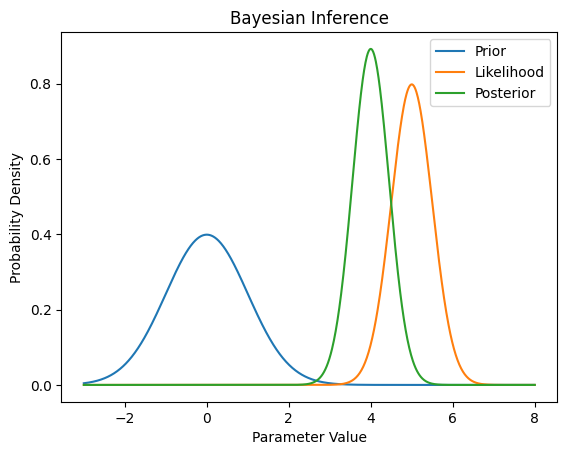

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Prior, Likelihood, and Posterior
def bayesian_inference(data, prior_mean, prior_std, likelihood_std):
    # Prior distribution
    prior = norm(loc=prior_mean, scale=prior_std)
    
    # Likelihood function
    likelihood = norm(loc=data, scale=likelihood_std)
    
    # Posterior distribution (assuming conjugate prior)
    posterior_mean = (prior_mean / prior_std**2 + data / likelihood_std**2) / (1 / prior_std**2 + 1 / likelihood_std**2)
    posterior_std = np.sqrt(1 / (1 / prior_std**2 + 1 / likelihood_std**2))
    posterior = norm(loc=posterior_mean, scale=posterior_std)
    
    return posterior

# Example usage
data = 5.0  # Observed data
prior_mean, prior_std = 0.0, 1.0  # Prior parameters
likelihood_std = 0.5  # Likelihood uncertainty

posterior = bayesian_inference(data, prior_mean, prior_std, likelihood_std)

# Plotting
x = np.linspace(-3, 8, 1000)
plt.plot(x, norm.pdf(x, prior_mean, prior_std), label="Prior")
plt.plot(x, norm.pdf(x, data, likelihood_std), label="Likelihood")
plt.plot(x, posterior.pdf(x), label="Posterior")
plt.legend()
plt.title("Bayesian Inference")
plt.xlabel("Parameter Value")
plt.ylabel("Probability Density")
plt.show()

# **linear regression**, two approaches: **direct matrix inversion** and the **ordinary least squares (OLS) solution**:

---

### **1. Problem Context**
The goal is to solve for the weights (\( w \)) in a linear regression model:

$
y = Xw + \epsilon
$

Where:
- \( y \): The dependent variable (output).
- \( X \): The matrix of independent variables (input features).
- \( w \): The weights (coefficients) to be estimated.
- $ \epsilon $: The error term (residuals).

---

### **2. Direct Matrix Inversion (Naive Approach)**
The simplest way to solve for \( w \) is to invert the matrix \( X \):

$
w = X^{-1} y
$

#### **Why This Works (When It Works)**:
- If \( X \) is a square matrix (number of observations = number of features) and invertible, this approach directly solves the system of linear equations.

#### **Limitations**:
- **Over-constrained Problem**: If there are more independent variables (features) than observations, \( X \) is not square, and its inverse does not exist.
- **Numerical Instability**: Even if \( X \) is square, inverting a matrix can be computationally expensive and prone to numerical errors, especially for large matrices.

---

### **3. Ordinary Least Squares (OLS) Solution**
When the direct inversion approach fails (e.g., in over-constrained or under-constrained problems), the **ordinary least squares (OLS)** method is used. The OLS solution is given by:

$
w = (X^T X)^{-1} X^T y
$

#### **Why This Works**:
- $ X^T X $ is a square matrix, and if it is invertible, this formula provides the best-fit solution for \( w \) in the least squares sense.
- It minimizes the sum of squared residuals (\( \epsilon \)), ensuring the best linear fit to the data.

#### **Steps in OLS**:
1. **Compute $ X^T X $**: Multiply the transpose of \( X \) by \( X \).
2. **Invert $ X^T X $**: Compute the inverse of the resulting square matrix.
3. **Multiply by $ X^T y $**: Multiply the inverse by $ X^T y $ to obtain the weights \( w \).

#### **Advantages**:
- Works for both over-constrained (more features than observations) and under-constrained (more observations than features) problems.
- Provides a unique solution that minimizes the error in the least squares sense.

---

### **4. Key Differences Between the Two Approaches**

| **Aspect**               | **Direct Inversion $( w = X^{-1} y )$** | **OLS $( w = (X^T X)^{-1} X^T y )$** |
|--------------------------|-------------------------------------------|-----------------------------------------|
| **Applicability**         | Only works if \( X \) is square and invertible. | Works for any \( X \) (over-constrained or under-constrained). |
| **Numerical Stability**   | Prone to instability for large or ill-conditioned matrices. | More stable due to the use of \( X^T X \). |
| **Computational Cost**    | High for large matrices.                  | More efficient for large datasets.      |
| **Use Case**              | Rarely used in practice.                 | Standard approach in linear regression. |


---

### **6. Why OLS is Preferred**
- **Generalizability**: OLS works for a wide range of problems, including those where direct inversion is impossible.
- **Efficiency**: It is computationally efficient and numerically stable.
- **Interpretability**: The solution minimizes the sum of squared errors, providing the best linear fit to the data.

---

### **7. Limitations of OLS**
- **Multicollinearity**: If $ X^T X $ is nearly singular (due to highly correlated features), the inverse may be unstable.
- **Scalability**: For very large datasets, computing $ (X^T X)^{-1} $ can be computationally expensive. In such cases, iterative methods like gradient descent are often used.

---

In [5]:
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [1, 3]])  # Design matrix (with bias term)
Y = np.array([2, 4, 6])  # Observed data

# Direct inversion (if X is square and invertible)
try:
    w_direct = np.linalg.inv(X) @ Y
    print("Direct Inversion Weights:", w_direct)
except:
    print("Direct inversion not possible (X is not square or invertible).")

# Ordinary Least Squares (OLS) solution
w_ols = np.linalg.inv(X.T @ X) @ X.T @ Y
print("OLS Weights:", w_ols)

Direct inversion not possible (X is not square or invertible).
OLS Weights: [-3.55271368e-15  2.00000000e+00]


# **Generalized Least Squares (GLS)**, an extension of the **Ordinary Least Squares (OLS)** method, which accounts for **individual uncertainties** in the data:

---

### **1. Problem Context**
In many real-world datasets, not all data points are equally reliable. Some observations may have higher uncertainty (e.g., due to measurement errors) than others. Generalized Least Squares (GLS) addresses this by incorporating a **covariance matrix** (\( C \)) that represents the uncertainties $( \sigma_i )$ associated with each data point.

---

### **2. Covariance Matrix (\( C \))**
The covariance matrix \( C \) is a diagonal matrix where each diagonal element represents the variance $( \sigma_i^2 )$ of the uncertainty for the corresponding data point:

$
C = 
\begin{bmatrix}
\sigma_1^2 & 0 & \cdots & 0 \\
0 & \sigma_2^2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_n^2
\end{bmatrix}
$

#### **Why It Matters**:
- The covariance matrix \( C \) weights each data point inversely proportional to its uncertainty. Data points with higher uncertainty $ \sigma_i $ contribute less to the solution, while data points with lower uncertainty contribute more.
- This ensures that the model is more influenced by reliable data and less influenced by noisy or uncertain data.

---

### **3. Generalized Least Squares (GLS) Formula**
The GLS solution for the weights \( w \) is given by:

$
w = [X^\top C^{-1} X]^{-1} X^\top C^{-1} Y
$

Where:
- \( X \): The matrix of independent variables (input features).
- \( Y \): The vector of dependent variables (output values).
- $ C^{-1} $: The inverse of the covariance matrix, which weights the data points based on their uncertainties.
- \( w \): The vector of weights (coefficients) to be estimated.

---

### **4. Key Differences Between OLS and GLS**

| **Aspect**               | **Ordinary Least Squares (OLS)** | **Generalized Least Squares (GLS)** |
|--------------------------|----------------------------------|--------------------------------------|
| **Uncertainty Handling** | Assumes all data points have equal uncertainty. | Accounts for individual uncertainties in data points. |
| **Covariance Matrix**     | Not used.                       | Uses \( C \) to weight data points based on their uncertainties. |
| **Formula**               | \( w = (X^\top X)^{-1} X^\top Y \) | \( w = [X^\top C^{-1} X]^{-1} X^\top C^{-1} Y \) |
| **Use Case**              | Suitable for homoscedastic data (constant variance). | Suitable for heteroscedastic data (non-constant variance). |

---

### **5. Why GLS is Useful**
- **Heteroscedastic Data**: GLS is particularly useful when the data exhibits heteroscedasticity (i.e., the variance of errors is not constant across observations).
- **Weighted Regression**: By incorporating the covariance matrix \( C \), GLS effectively performs a weighted regression, giving more importance to data points with lower uncertainty.
- **Improved Accuracy**: GLS provides more accurate and reliable estimates of the model parameters when the uncertainties in the data are known.

---

### **6. Practical Example**
Suppose we are fitting a linear model \( y = mx + b \) to data where each data point has a known uncertainty \( \sigma_i \).

#### **Steps in GLS**:
1. **Construct \( C \)**: Create the covariance matrix \( C \) using the uncertainties \( \sigma_i \).
2. **Compute \( C^{-1} \)**: Invert the covariance matrix to weight the data points.
3. **Solve for \( w \)**: Use the GLS formula to compute the weights \( w = [X^\top C^{-1} X]^{-1} X^\top C^{-1} Y \).

#### **Result**:
- The weights \( w \) (slope \( m \) and intercept \( b \)) are estimated in a way that accounts for the uncertainties in the data.

---

### **7. Limitations of GLS**
- **Known Uncertainties**: GLS requires knowledge of the uncertainties \( \sigma_i \) for each data point. If these are unknown, they must be estimated, which can introduce additional complexity.
- **Computational Cost**: Inverting the covariance matrix \( C \) can be computationally expensive for large datasets.

---

### **8. Comparison with Weighted Least Squares (WLS)**
- GLS is a generalization of **Weighted Least Squares (WLS)**, where the covariance matrix \( C \) is diagonal (i.e., uncertainties are uncorrelated).
- If the uncertainties are correlated (off-diagonal elements in \( C \) are non-zero), GLS is necessary to account for these correlations.

---

In [6]:
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [1, 3]])  # Design matrix
Y = np.array([2, 4, 6])  # Observed data
C = np.diag([0.1, 0.2, 0.3])  # Covariance matrix (uncertainties)

# GLS solution
C_inv = np.linalg.inv(C)
w_gls = np.linalg.inv(X.T @ C_inv @ X) @ X.T @ C_inv @ Y
print("GLS Weights:", w_gls)

GLS Weights: [3.77475828e-15 2.00000000e+00]


# The connection between **least-squares regression** and **probability theory**, specifically how minimizing the **chi-squared statistic** $ \chi^2 $ is equivalent to maximizing the **log-likelihood** of a **Gaussian (normal) distribution**:

---

### **1. Chi-Squared Statistic (\( \chi^2 \))**
The chi-squared statistic measures the discrepancy between observed data $ y_i $ and the model predictions $ f(x_i) $, normalized by the uncertainties $ c_i $:

$
\chi^2 \equiv \sum_{i} \frac{(y_i - f(x_i))^2}{c_i^2}
$

#### **Why It Matters**:
- $ \chi^2 $ quantifies how well the model fits the data, accounting for the uncertainties in the measurements.
- A smaller $ \chi^2 $ indicates a better fit between the model and the data.

---

### **2. Matrix Form of $ \chi^2 $**
The chi-squared statistic can also be expressed in matrix form:

$
\chi^2 = [\mathbf{Y} - \mathbf{X} \cdot \mathbf{w}]^T C^{-1} [\mathbf{Y} - \mathbf{X} \mathbf{w}]
$

Where:
- $ \mathbf{Y} $: The vector of observed data.
- $ \mathbf{X} $: The matrix of independent variables (input features).
- $ \mathbf{w} $: The vector of model parameters (weights).
- \( C \): The covariance matrix representing the uncertainties in the data.

#### **Why This Form is Useful**:
- This formulation generalizes the chi-squared statistic to handle correlated uncertainties (off-diagonal elements in \( C \)).
- It connects the chi-squared statistic to the concept of **Gaussian log-likelihood**.

---

### **3. Gaussian Log-Likelihood**
For a **multivariate normal distribution**, the probability density function is given by:

$
p(\mathbf{x}) \sim \mathcal{N}(\mu, \mathbf{C})
$

The **log-likelihood** of this distribution is proportional to:

$
\log p(\mathbf{x}) \propto (\mathbf{x} - \mu)^T C^{-1} (\mathbf{x} - \mu)
$

#### **Connection to \( \chi^2 \)**:
- The chi-squared statistic \( \chi^2 \) is essentially the negative log-likelihood of the data under the assumption that the residuals (\( \mathbf{Y} - \mathbf{X} \mathbf{w} \)) follow a multivariate normal distribution with mean \( 0 \) and covariance \( C \).
- Minimizing \( \chi^2 \) is equivalent to maximizing the log-likelihood of the data, which is a fundamental principle in **maximum likelihood estimation (MLE)**.

---

### **4. Why This is Called Least-Squares Regression**
- The term **least-squares regression** comes from minimizing the sum of squared differences between the observed data and the model predictions.
- In the context of uncertainties, this sum is weighted by the inverse of the covariance matrix \( C \), ensuring that data points with higher uncertainty contribute less to the fit.

---

### **5. Key Takeaways**

| **Concept**               | **Explanation**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Chi-Squared (\( \chi^2 \))** | Measures the discrepancy between data and model, normalized by uncertainties.   |
| **Gaussian Log-Likelihood** | The log-likelihood of a multivariate normal distribution is proportional to \( \chi^2 \). |
| **Least-Squares Regression** | Minimizing \( \chi^2 \) is equivalent to maximizing the Gaussian log-likelihood. |
| **Covariance Matrix (\( C \))** | Accounts for uncertainties and correlations in the data.                        |

---

### **6. Practical Implications**
- **Model Fitting**: When fitting a model to data, minimizing \( \chi^2 \) ensures that the model best explains the observed data, accounting for uncertainties.
- **Uncertainty Quantification**: The covariance matrix \( C \) allows for a rigorous treatment of uncertainties, improving the reliability of the model.
- **Statistical Inference**: The connection to Gaussian log-likelihood provides a probabilistic framework for hypothesis testing and confidence intervals.

---

### **7. Example**
Suppose we are fitting a linear model \( y = mx + b \) to data with known uncertainties \( \sigma_i \).

#### **Steps**:
1. **Construct \( C \)**: Create the covariance matrix \( C \) using the uncertainties \( \sigma_i \).
2. **Compute \( \chi^2 \)**: Calculate the chi-squared statistic using the matrix form.
3. **Minimize \( \chi^2 \)**: Solve for the weights \( \mathbf{w} \) that minimize \( \chi^2 \), which is equivalent to maximizing the Gaussian log-likelihood.

#### **Result**:
- The fitted model parameters \( \mathbf{w} \) provide the best fit to the data, accounting for uncertainties.

---

### **8. Limitations**
- **Gaussian Assumption**: The connection to Gaussian log-likelihood assumes that the residuals follow a normal distribution. If this assumption is violated, alternative methods may be needed.
- **Known Uncertainties**: The approach requires knowledge of the uncertainties \( \sigma_i \). If these are unknown, they must be estimated, which can introduce additional complexity.

---

In [7]:
import numpy as np

# Example data
X = np.array([[1, 1], [1, 2], [1, 3]])  # Design matrix
Y = np.array([2, 4, 6])  # Observed data
C = np.diag([0.1, 0.2, 0.3])  # Covariance matrix (uncertainties)

# Chi-squared calculation
def chi_squared(Y, X, w, C):
    residuals = Y - X @ w
    return residuals.T @ np.linalg.inv(C) @ residuals

# Example weights
w = np.array([1.0, 1.5])  # Example parameters
chi2 = chi_squared(Y, X, w, C)
print("Chi-Squared Value:", chi2)

# Gaussian log-likelihood
def log_likelihood(Y, X, w, C):
    residuals = Y - X @ w
    return -0.5 * residuals.T @ np.linalg.inv(C) @ residuals

log_lik = log_likelihood(Y, X, w, C)
print("Log-Likelihood Value:", log_lik)

Chi-Squared Value: 3.3333333333333335
Log-Likelihood Value: -1.6666666666666667


# The importance of quantifying **uncertainty in the inferred parameters** of a model:

---

### **1. Uncertainty in Inferred Parameters**
When fitting a model to data, it’s not enough to just estimate the parameters (e.g., slope \( m \) and intercept \( b \) in linear regression). We also need to quantify the **uncertainty** in these estimates. This uncertainty arises from:
- Noise or errors in the data.
- Limited sample size.
- Correlations between parameters.

---

### **2. Covariance Matrix of Parameters $ C_w $**
The covariance matrix $ C_w $ quantifies the uncertainty in the inferred parameters and their correlations. For a linear regression model with parameters \( m \) (slope) and \( b \) (intercept), $ C_w $ is given by:

$
C_w \equiv 
\begin{bmatrix}
\sigma_b^2 & \sigma_{mb} \\
\sigma_{mb} & \sigma_m^2
\end{bmatrix}
= [X^T C_y^{-1} X]^{-1}
$

Where:
- $ \sigma_b^2 $: Variance of the intercept \( b \).
- $ \sigma_m^2 $: Variance of the slope \( m \).
- $ \sigma_{mb} $: Covariance between \( m \) and \( b \), representing how changes in one parameter affect the other.
- \( X \): The matrix of independent variables (input features).
- \( C_y \): The covariance matrix of the observed data (uncertainties in \( y \)).

#### **Why It Matters**:
- $ C_w $ provides a complete description of the uncertainty in the model parameters.
- It allows us to understand not only the individual uncertainties $ \sigma_b^2 $ and $ \sigma_m^2 $ but also the correlations between parameters $\sigma_{mb} $.

---

### **3. Drawing Samples from a Multivariate Normal Distribution**
Once we have $ C_w $, we can represent the uncertainty in the parameters by drawing samples from a **multivariate normal distribution**:

$
\mathbf{w} \sim \mathcal{N}(\mathbf{w}_{\text{best-fit}}, C_w)
$

Where:
- $ \mathbf{w}_{\text{best-fit}} $: The best-fit parameters (e.g., \( m \) and \( b \)) obtained from the regression.
- $ C_w $: The covariance matrix of the parameters.

#### **Why This is Useful**:
- Drawing samples from this distribution allows us to:
  - Visualize the range of possible parameter values.
  - Propagate uncertainty through the model to make probabilistic predictions.
  - Perform sensitivity analysis to understand how changes in parameters affect the model output.

---

### **4. Practical Example**
Suppose we fit a linear regression model \( y = mx + b \) to data with known uncertainties \( \sigma_i \).

#### **Steps**:
1. **Compute $ C_w $**: Use the formula $ C_w = [X^T C_y^{-1} X]^{-1} $ to calculate the covariance matrix of the parameters.
2. **Draw Samples**: Generate samples of \( m \) and \( b \) from the multivariate normal distribution $ \mathcal{N}(\mathbf{w}_{\text{best-fit}}, C_w) $.
3. **Analyze Uncertainty**: Use the samples to analyze the uncertainty in the model parameters and predictions.

#### **Result**:
- The samples provide a probabilistic representation of the parameter uncertainty, which can be used for further analysis or visualization.

---

### **5. Key Takeaways**

| **Concept**               | **Explanation**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Covariance Matrix $C_w $** | Quantifies uncertainty and correlations in the inferred parameters.             |
| **Multivariate Normal Distribution** | Used to represent uncertain parameters by drawing samples from $ \mathcal{N}(\mathbf{w}_{\text{best-fit}}, C_w) $. |
| **Uncertainty Propagation** | Allows for probabilistic predictions and sensitivity analysis.                  |

---

### **6. Why This is Important**
- **Reliability**: Quantifying uncertainty ensures that the model predictions are reliable and not overly confident.
- **Decision Making**: Understanding parameter uncertainty is crucial for making informed decisions based on the model.
- **Model Validation**: Uncertainty analysis helps validate the model by comparing predicted uncertainties with observed variability.

---

### **7. Limitations**
- **Gaussian Assumption**: The approach assumes that the parameter uncertainties follow a multivariate normal distribution. If this assumption is violated, alternative methods may be needed.
- **Computational Cost**: Calculating \( C_w \) and drawing samples can be computationally expensive for large datasets or complex models.

---

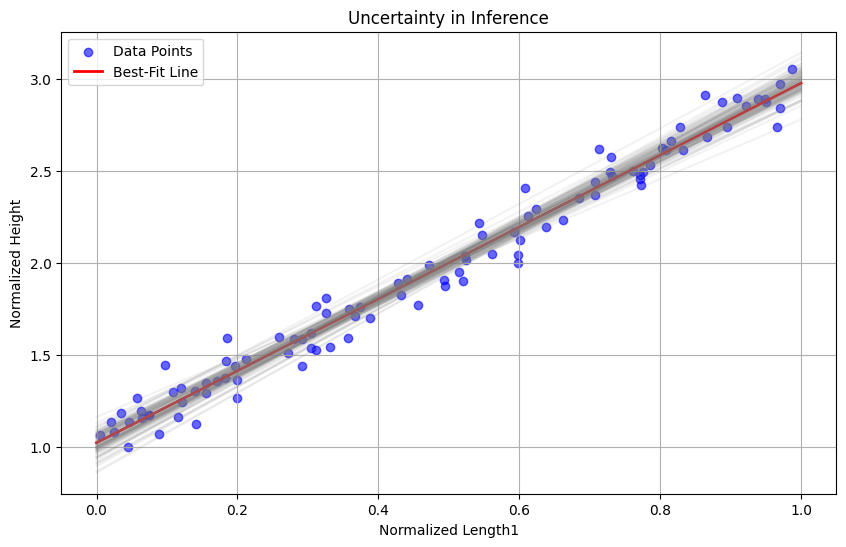

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data
np.random.seed(42)  # For reproducibility
n_samples = 100
X = np.random.rand(n_samples, 1)  # Normalized Length1 (independent variable)
Y = 2 * X + 1 + 0.1 * np.random.randn(n_samples, 1)  # Normalized Height (dependent variable)

# Design matrix (with bias term)
design_matrix = np.hstack([np.ones((n_samples, 1)), X])

# OLS solution for parameters (b = [intercept, slope])
b = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ Y

# Residuals
residuals = Y - design_matrix @ b

# Uncertainty in parameters
uncertainty = np.std(residuals) * np.linalg.inv(design_matrix.T @ design_matrix)

# Draw samples from multivariate normal distribution
samples = []
for j in range(100):
    bb = stats.multivariate_normal.rvs(b.flatten(), uncertainty)
    samples.append(bb)

samples = np.array(samples)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X, Y, color="blue", label="Data Points", alpha=0.6)

# Plot the best-fit line
x_vals = np.linspace(0, 1, 100)
y_vals = b[0] + b[1] * x_vals
plt.plot(x_vals, y_vals, color="red", label="Best-Fit Line", linewidth=2)

# Plot uncertainty bands
for bb in samples:
    y_uncertainty = bb[0] + bb[1] * x_vals
    plt.plot(x_vals, y_uncertainty, color="gray", alpha=0.1)

plt.xlabel("Normalized Length1")
plt.ylabel("Normalized Height")
plt.title("Uncertainty in Inference")
plt.legend()
plt.grid(True)
plt.show()


### **Explanation of the Code**

1. **Data Generation**:
   - `X` represents the independent variable (**Normalized Length1**).
   - `Y` represents the dependent variable (**Normalized Height**), generated using a linear relationship with some noise.

2. **Design Matrix**:
   - The design matrix includes a column of ones for the intercept term.

3. **OLS Solution**:
   - The parameters \( b \) (intercept and slope) are estimated using the OLS formula.

4. **Residuals and Uncertainty**:
   - Residuals are calculated as the difference between observed and predicted values.
   - The uncertainty in the parameters is computed using the residuals and the design matrix.

5. **Sampling from Multivariate Normal**:
   - Samples of the parameters are drawn from a multivariate normal distribution to represent uncertainty.

6. **Plotting**:
   - The data points are plotted.
   - The best-fit line is plotted in red.
   - Uncertainty bands are plotted in gray, representing the range of possible fits due to parameter uncertainty.

---

### **Output**
- The plot will show:
  - Data points in blue.
  - The best-fit line in red.
  - Gray lines representing the uncertainty in the inferred parameters.
----
### **Customization**
- You can modify the data generation process (`X` and `Y`) to use your own dataset.
- Adjust the number of samples (`n_samples`) or the noise level in `Y` to see how it affects the uncertainty bands.

________________________
# Metrics for **assessing goodness-of-fit** in regression models:


### **Explanation of the Metrics**

1. **R-squared (Coefficient of Determination)**:
   - Measures the proportion of variance in the dependent variable that is predictable from the independent variables.
   - Ranges from 0 to 1, where:
     - 0: The model explains none of the variance.
     - 1: The model explains all the variance.
   - **Formula**: $ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $
     - $ SS_{res} $: Sum of squared residuals.
     - $ SS_{tot} $: Total sum of squares.

2. **Reduced Chi-Squared**:
   - The chi-squared statistic divided by the degrees of freedom.
   - Indicates how well the model fits the data:
     - Values >> 1: The model underfits the data.
     - Values ~ 1: The model fits the data well.
     - Values << 1: The model overfits the data.
   - **Formula**: $ \chi^2_{\text{red}} = \frac{\chi^2}{\text{dof}} $
     - $ \chi^2 $: Sum of squared residuals normalized by uncertainties (if available).
     - $ \text{dof} $: Degrees of freedom (number of observations - number of parameters).

3. **Root Mean Squared Error (RMSE)**:
   - Measures the average magnitude of the residuals.
   - Lower values indicate a better fit.
   - **Formula**: $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2} $

4. **Median Absolute Error (MAE)**:
   - The median of the absolute values of the residuals.
   - More robust to outliers compared to RMSE.
   - **Formula**: $ \text{MAE} = \text{median}(|Y_i - \hat{Y}_i|) $


In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, median_absolute_error

# Example data
np.random.seed(42)  # For reproducibility
n_samples = 100
X = np.random.rand(n_samples, 1)  # Independent variable
Y = 2 * X + 1 + 0.1 * np.random.randn(n_samples, 1)  # Dependent variable with noise

# Design matrix (with bias term)
design_matrix = np.hstack([np.ones((n_samples, 1)), X])

# OLS solution for parameters (b = [intercept, slope])
b = np.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ Y

# Predicted values
Y_pred = design_matrix @ b

# Residuals
residuals = Y - Y_pred

# Goodness-of-Fit Metrics

# 1. R-squared (Coefficient of Determination)
def r_squared(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r_squared(Y, Y_pred)
print("R-squared:", r2)

# 2. Reduced Chi-Squared
def reduced_chi_squared(residuals, Y, n_params):
    chi2 = np.sum(residuals ** 2)
    dof = len(Y) - n_params  # Degrees of freedom
    return chi2 / dof

n_params = 2  # Number of fitted parameters (intercept and slope)
chi2_red = reduced_chi_squared(residuals, Y, n_params)
print("Reduced Chi-Squared:", chi2_red)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("RMSE:", rmse)

# 4. Median Absolute Error (MAE)
mae = median_absolute_error(Y, Y_pred)
print("MAE:", mae)

R-squared: 0.9764567983510799
Reduced Chi-Squared: 0.008230454734357691
RMSE: 0.08981005311027568
MAE: 0.05429119887207157


### **Interpretation**
- **R-squared**: Close to 1 indicates a good fit.
- **Reduced Chi-Squared**: Close to 1 indicates a good fit.
- **RMSE**: Lower values indicate better fit.
- **MAE**: Lower values indicate better fit, with robustness to outliers.

________________________________________________________
# **regularization** in regression models, specifically **Ridge Regression** (L2 penalty) and **Lasso Regression** (L1 penalty):
## **Explanation of Regularization**

#### **1. Ridge Regression (L2 Penalty)**
- **Objective**: Minimize the sum of squared residuals plus a penalty term proportional to the sum of the squares of the coefficients.
- **Loss Function**:
  $
  \text{Loss}_{\text{ridge}} = \sum_{i} \left( y_i - \sum_{j} X_{ij} \beta_j \right)^2 + \alpha \sum_{j} \beta_j^2
  $
  - $ \alpha $: Regularization strength (hyperparameter).
  - $ \beta_j $: Model coefficients.
- **Effect**: Shrinks coefficients towards zero but does not set them exactly to zero. Helps reduce overfitting by discouraging large coefficients.

#### **2. Lasso Regression (L1 Penalty)**
- **Objective**: Minimize the sum of squared residuals plus a penalty term proportional to the sum of the absolute values of the coefficients.
- **Loss Function**:
  $
  \text{Loss}_{\text{lasso}} = \sum_{i} \left( y_i - \sum_{j} X_{ij} \beta_j \right)^2 + \alpha \sum_{j} |\beta_j|
  $
  - $ \alpha $: Regularization strength (hyperparameter).
  - $ \beta_j $: Model coefficients.
- **Effect**: Can set some coefficients exactly to zero, effectively performing feature selection. Useful for models with many features.

---

### **Key Differences Between Ridge and Lasso**

| **Aspect**               | **Ridge Regression (L2)** | **Lasso Regression (L1)** |
|--------------------------|---------------------------|---------------------------|
| **Penalty Term**         | Sum of squared coefficients $ \beta_j^2 $. | Sum of absolute coefficients $ |\beta_j| $. |
| **Effect on Coefficients** | Shrinks coefficients towards zero. | Can set coefficients exactly to zero. |
| **Use Case**             | Prevents overfitting by reducing coefficient magnitudes. | Performs feature selection by eliminating irrelevant features. |
| **Hyperparameter**       | $ \alpha $ controls regularization strength. | $ \alpha $ controls regularization strength. |

In [11]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data
np.random.seed(42)  # For reproducibility
n_samples = 100
X = np.random.rand(n_samples, 5)  # 5 independent variables
Y = 2 * X[:, 0] + 1 * X[:, 1] + 0.5 * X[:, 2] + 0.1 * np.random.randn(n_samples)  # Dependent variable with noise

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ridge Regression (L2 penalty)
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Coefficients:", ridge.coef_)

# Lasso Regression (L1 penalty)
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Coefficients:", lasso.coef_)

Ridge Regression MSE: 0.012850395229770628
Ridge Coefficients: [ 1.69678568  0.83704873  0.45736932  0.02117932 -0.06697084]
Lasso Regression MSE: 0.14482198045194844
Lasso Coefficients: [ 0.67099464  0.          0.         -0.         -0.        ]


### **Interpretation**
- **Ridge Regression**: All coefficients are shrunk but none are exactly zero.
- **Lasso Regression**: Some coefficients are set to zero, indicating feature selection.

# End of Linear Regression week 4 tutorial